In [2]:
class G:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __call__(self, x_new):
        return self.x *x_new + self.y * x_new**2

A = G(2, 3)
print(A(4))

56


In [ ]:
from scipy.interpolate import interp1d

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_13388\3643563861.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


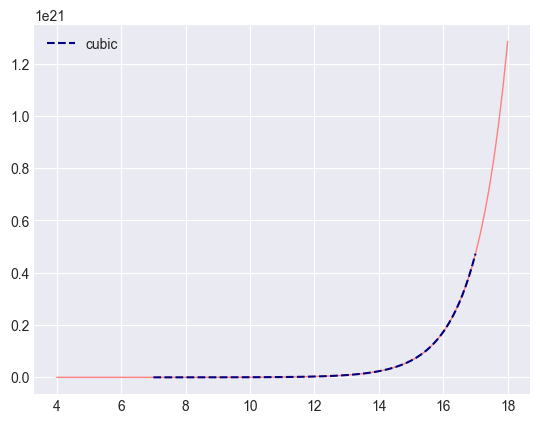

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from interp import cubic_spline_interp
x = np.linspace(4, 18, 100)
y = 100*np.exp(x+26)
x_new = np.linspace(7, 17, 100)
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw = 1, c = [1, 0.5, 0.5])
F = cubic_spline_interp(x, y, 0, 0)
y_new = F(x_new)
plt.plot(x_new, y_new, label='cubic', ls= '--', c = [0, 0, 0.5])
plt.legend()
plt.show()

[2.5 1.  2.5]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_13588\2902973316.py:74: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


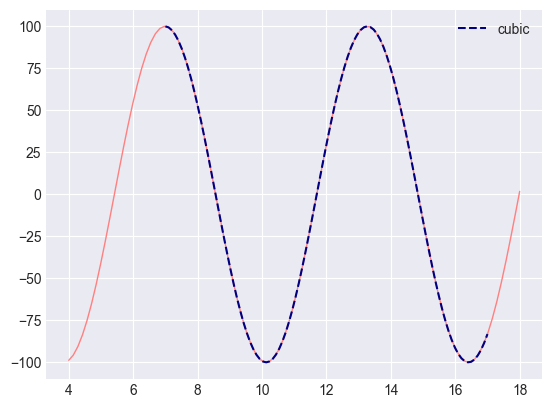

: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def idx_location(x, y):
    y = np.reshape(y, (-1, 1))
    idx = np.arange(len(x))
    idx = np.tile(idx, len(y))
    idx = np.arange(len(x))
    Idx = np.tile(idx, (len(y), 1))
    match_ = np.less_equal(x, y)
    max_less_y_idx = np.max(match_ * Idx, axis=1)
    return max_less_y_idx

class cubic_spline_interp:
    def __init__(self, x, y, second_diff_x0 = 0, second_diff_xn = 0):
        x = np.reshape(x, -1)
        y = np.reshape(y, -1)
        self.x = np.sort(x)
        self.y = y[np.argsort(x)]
        self.second_diff_x0 = second_diff_x0
        self.second_diff_xn = second_diff_xn
    def interp_function(self):
        diff_x = self.x[1:] - self.x[:-1]
        diff_y = self.y[1:] - self.y[:-1]
        slope = diff_y / diff_x

        slope_1 = slope[1:]
        slope_2 = slope[:-1]

        second_diff_x0 = self.second_diff_x0
        second_diff_xn = self.second_diff_xn
        f = np.hstack((second_diff_x0, 3*(slope_1-slope_2), second_diff_xn))
        f = np.reshape(f, (-1, 1))
        n = len(self.x)
        H = np.zeros((n, n))
        H[0, 0] = 1
        H[n-1, n-1] = 1

        for i in range(1, n-1, 1):
            H[i, i-1:i+2] = np.array([diff_x[i-1], 2*(diff_x[i-1] + diff_x[i]), diff_x[i]])

        c = np.linalg.inv(H) @ f

        d = (c[1:]-c[:-1]) / (3*np.reshape(diff_x, (-1, 1)))
        b = np.reshape(slope, (-1,1)) - (1/3)*(2*c[:-1] + c[1:])*np.reshape(diff_x, (-1, 1))
        a = np.reshape(y[:-1], (-1, 1))

        c = np.reshape(c[:-1], (-1, 1))
        return np.hstack((a, b, c, d))
    def __call__(self, x_new):
        func = self.interp_function()
        
        x_new = np.reshape(x_new, (-1))
        power = np.reshape(np.repeat(np.arange(4), (len(x_new))), (4, -1))
        max_less_x_new_idx = idx_location(self.x, x_new)
        idx = np.arange(len(max_less_x_new_idx))
        greater_equal_xmax = idx[np.greater_equal(max_less_x_new_idx, len(self.x)-1)]
        max_less_x_new_idx[greater_equal_xmax] = len(x)-2
        
        Func = func[max_less_x_new_idx]
        X_new = (x_new - self.x[max_less_x_new_idx]) ** power
 
        return np.diagonal(Func @ X_new)
x = np.array([3, 4.5, 7, 9])
y = np.array([2.5, 1, 2.5, 0.5])

A = cubic_spline_interp(x, y)
y_new = A(x[:-1])
print(y_new)


x = np.linspace(4, 18, 100)
y = 100*np.sin(x+26)
x_new = np.linspace(7, 17, 100)
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, lw = 1, c = [1, 0.5, 0.5])
F = cubic_spline_interp(x, y, 0, 0)
y_new = F(x_new)
plt.plot(x_new, y_new, label='cubic', ls= '--', c = [0, 0, 0.5])
plt.legend()
plt.show()

In [118]:
x = np.array([1, 2])
p = np.reshape(np.repeat(np.arange(4), (len(x))), (4, -1))

print(x ** p)

[[1 1]
 [1 2]
 [1 4]
 [1 8]]


In [77]:
def idx_location(x, y):
    x = np.reshape(x, -1)
    y = np.reshape(y, (-1, 1))
    idx = np.arange(len(x))
    idx = np.tile(idx, len(y))
    idx = np.arange(len(x))
    Idx = np.tile(idx, (len(y), 1))
    match_ = np.less_equal(x, y)
    max_less_y_idx = np.max(match_ * Idx, axis=1)
    return max_less_y_idx


x = np.array([[1, 3, 8, 15]])
y = np.array([-1, 10, 4, 12])

A = np.random.choice(range(10), (4, 6))
print(A)
print(A[idx_location(x, y)])
#idx_greater_y = idx[np.greater(x, y)]


#l = np.min(idx_greater_y)
#print(k, l)



[[7 6 2 4 2 2]
 [7 4 0 9 2 1]
 [4 7 8 9 0 2]
 [5 8 3 8 9 6]]
[[7 6 2 4 2 2]
 [4 7 8 9 0 2]
 [7 4 0 9 2 1]
 [4 7 8 9 0 2]]
